In [192]:
import sys
!{sys.executable} -m pip install google-api-python-client

In [193]:
import csv


In [194]:
import matplotlib.pyplot as plt


In [195]:

from googleapiclient.discovery import build


In [ ]:


api_key = 'hidden'    #API key hidden, should be replaced before running this file 

service = build('youtube', 'v3', developerKey=api_key)

nextPageToken = None

with open('quest2.csv', 'w', newline='', encoding='utf-8') as results:
    csvwrite = csv.writer(results)
    csvwrite.writerow(['Video ID', 'Title', 'Channel', 'Published At'])

    while True:
        request = service.search().list(
            q='AfD',
            part='snippet',
            type='video',
            maxResults=50,
            pageToken=nextPageToken,
            publishedAfter='2024-11-01T00:00:00Z',
            publishedBefore='2025-02-28T23:59:59Z'
        )
        response = request.execute()
        items = response.get('items', [])



        for each_item in items:
            video_id = each_item.get('id', {}).get('videoId')
            snippet = each_item.get('snippet', {})

            if not video_id:   # skip if no videoId
                continue

            video_id = each_item['id']['videoId']
            title = each_item['snippet']['title']
            channel = each_item['snippet']['channelTitle']
            published = each_item['snippet']['publishedAt']

            csvwrite.writerow([video_id, title, channel, published])

        nextPageToken = response.get('nextPageToken')
        if not nextPageToken:
            break

In [197]:
# importing pandas package
import pandas as pd

In [198]:
# assign dataset
csvData = pd.read_csv("quest2.csv")


In [199]:
                                       
# displaying unsorted data frame
print("\nBefore sorting:")
csvData



Before sorting:


,Video ID,Title,Channel,Published At
0,BofPPYIRvRs,#AfD Wahlwerbespot zur Bundestagswahl 2025 💙,Dirk Brandes - MdB,2025-01-25T15:13:26Z
1,hc5TR-HLSBA,Warum AfD-Wähler nicht von der Partei profitie...,MDR Aktuell,2025-02-28T11:01:08Z
2,m9byYrTRY20,Lasst uns mit AfD-Wählern sprechen! #AfD #Poli...,MDR Aktuell,2025-02-27T13:01:15Z
3,5fceejLYXrs,Nichts verfassungsfeindliches im AfD-Programm ...,DACH Medien,2024-12-11T16:00:07Z
4,smudpUcRqSo,Lanz: Die AfD will die Union zerstören | #Podc...,ZDFheute Nachrichten,2025-02-08T10:01:01Z
...,...,...,...,...
506,cUNQWUhD-qs,Wen soll man 2025 wählen?,A. H. Effekt03,2024-12-17T21:51:46Z
507,TQPHo7U12tQ,GERMANY ELECTIONS 2025 | Rise of Right Wing |...,Voice,2025-02-24T08:03:33Z
508,iFKYz78-M8Y,&quot;Nazi&quot;-Statement zum Talk zwischen #...,A. H. Effekt02,2025-01-11T12:33:23Z
509,x0Z70w_PA3U,Ken Jebsen aka Kayvan Soufi-Siavash ist ein dr...,A. H. Effekt02,2025-01-12T17:47:10Z


In [200]:

# Ensure 'Published At' is a datetime column
csvData['Published At'] = pd.to_datetime(csvData['Published At'])

# Sort by date (ascending = oldest first)
df_sorted = csvData.sort_values(by='Published At', ascending=True)

# Optional: reset the index
df_sorted = df_sorted.reset_index(drop=True)


In [201]:

df_sorted



,Video ID,Title,Channel,Published At
0,0K0cDY7miEc,Get the Best Hotel Prices on MakeMyTrip! 🏨 | F...,MakeMyTripOfficial,2024-11-08 11:17:20+00:00
1,HyQzf2-A_NM,Geheimtreffen zwischen Kretschmer (CDU) und Ur...,DACH Medien,2024-11-09 08:00:17+00:00
2,3Q3bS10FPHw,"CDU, FDP und AfD fordern rasche Vertrauensfrag...",DACH Medien,2024-11-10 08:00:03+00:00
3,N7ttxZK_sZI,So steht die AfD zu Israel! #afd #ltnrw,AfD-Fraktion NRW,2024-11-12 18:00:15+00:00
4,mqlSpfMVA-U,Harald Schmidt: Beteilige mich nicht an AfD-Ba...,DACH Medien,2024-11-12 18:00:34+00:00
...,...,...,...,...
506,eYctuPJUBgI,Warum ist die AfD so erfolgreich?,Geld für die Welt — Maurice Höfgen,2025-02-28 15:01:02+00:00
507,MHg8zeS8gX4,Wie die AfD über Hitler streitet | heute-show ...,ZDF heute-show,2025-02-28 16:22:41+00:00
508,DJZB5D6iPgc,❌ALICE WEIDEL REDET KLARTEXT ❌ #aliceweidel #a...,Rich Kids of Wall Street,2025-02-28 18:28:04+00:00
509,Tqa6R6tQByk,"Nach der Wahl: Scholz tritt ab, Merz übernimmt...",ZDF heute-show,2025-02-28 21:30:06+00:00


In [202]:
# 1. Ensure 'Published At' is a datetime column
df_sorted['Published At'] = pd.to_datetime(df_sorted['Published At'])

# 2. Set 'Published At' as the index
df_sorted = df_sorted.set_index('Published At')

# 3. Group by month end
csvDataByMonth = df_sorted.groupby(pd.Grouper(freq='W-MON')).count()  # sum or count depending on your use case

csvDataByMonth

,Video ID,Title,Channel
Published At,,,
2024-11-11 00:00:00+00:00,3,3,3
2024-11-18 00:00:00+00:00,9,9,9
2024-11-25 00:00:00+00:00,4,4,4
2024-12-02 00:00:00+00:00,5,5,5
2024-12-09 00:00:00+00:00,9,9,9
2024-12-16 00:00:00+00:00,8,8,8
2024-12-23 00:00:00+00:00,16,16,16
2024-12-30 00:00:00+00:00,12,12,12
2025-01-06 00:00:00+00:00,13,13,13


In [203]:
csv2 = csvDataByMonth.drop(labels=None, axis=0, index=None, columns={'Video ID','Channel'}, level=None, inplace=False, errors='raise')
csv2

,Title
Published At,
2024-11-11 00:00:00+00:00,3
2024-11-18 00:00:00+00:00,9
2024-11-25 00:00:00+00:00,4
2024-12-02 00:00:00+00:00,5
2024-12-09 00:00:00+00:00,9
2024-12-16 00:00:00+00:00,8
2024-12-23 00:00:00+00:00,16
2024-12-30 00:00:00+00:00,12
2025-01-06 00:00:00+00:00,13


In [204]:
csv3 = csv2.rename(columns={'Title': 'Number of Videos'})
csv3

,Number of Videos
Published At,
2024-11-11 00:00:00+00:00,3
2024-11-18 00:00:00+00:00,9
2024-11-25 00:00:00+00:00,4
2024-12-02 00:00:00+00:00,5
2024-12-09 00:00:00+00:00,9
2024-12-16 00:00:00+00:00,8
2024-12-23 00:00:00+00:00,16
2024-12-30 00:00:00+00:00,12
2025-01-06 00:00:00+00:00,13


<Axes: title={'center': 'Weekly number of videos uploaded'}, xlabel='Published At'>

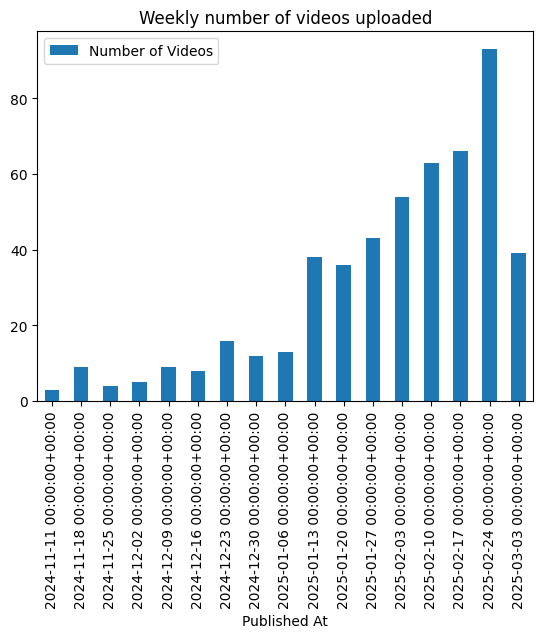

In [206]:
plot = csv3.plot(title='Weekly number of videos uploaded', kind= 'bar')
plot